In [1]:


# install slim version (default): if you get an error message, run it again one or more times: 
!pip3 install pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.6 MB/s eta 0:00:00
 

In [2]:

#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:


print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)
     


Pandas version:  1.5.3
Seaborn version:  0.12.2


In [5]:
#read cvs file into dataframe
df = pd.read_csv('BankNoteAuthentication.csv')
df.head(25)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [7]:

df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1348 non-null   float64
 1   skewness  1348 non-null   float64
 2   curtosis  1348 non-null   float64
 3   entropy   1348 non-null   float64
 4   class     1348 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.2 KB


In [9]:


print("Number of duplicated rows is: ", df.duplicated().sum())
     


Number of duplicated rows is:  0


In [10]:


print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())
     


Number of rows with NaNs is:  0


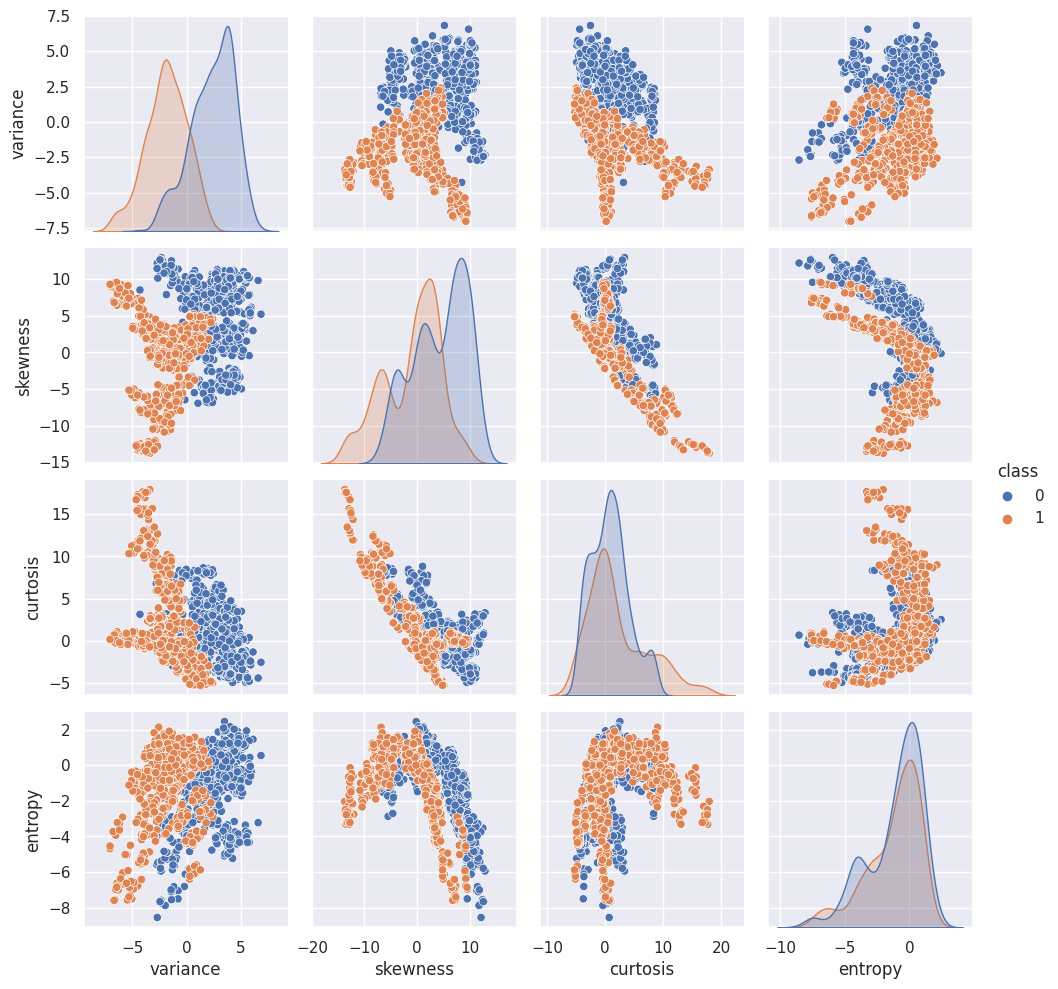

In [11]:


sns.pairplot(df, hue='class')
plt.show()
     


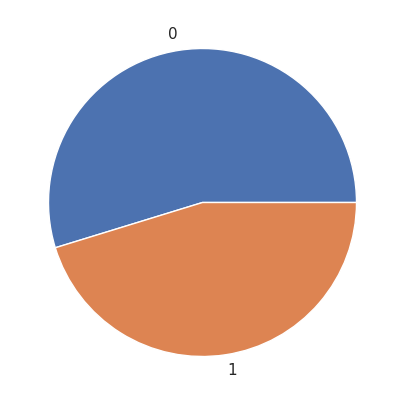

In [12]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [13]:

X = df.drop(columns=['class'])
X.head(10)    


,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.80730,-0.44699
1,4.54590,8.1674,-2.45860,-1.46210
2,3.86600,-2.6383,1.92420,0.10645
3,3.45660,9.5228,-4.01120,-3.59440
4,0.32924,-4.4552,4.57180,-0.98880
5,4.36840,9.6718,-3.96060,-3.16250
6,3.59120,3.0129,0.72888,0.56421
7,2.09220,-6.8100,8.46360,-0.60216
8,3.20320,5.7588,-0.75345,-0.61251
9,1.53560,9.1772,-2.27180,-0.73535


In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)    


,variance,skewness,curtosis,entropy
0,1.109709,1.151820,-0.975529,0.346132
1,1.432683,1.066810,-0.894937,-0.140707
2,1.195109,-0.775147,0.118015,0.611558
3,1.052054,1.297854,-1.253774,-1.163342
4,-0.040724,-1.084859,0.729928,0.086284
5,1.370660,1.323253,-1.242079,-0.956206
6,1.099087,0.188166,-0.158247,0.831096
7,0.575299,-1.486262,1.629400,0.271714
8,0.963510,0.656236,-0.500843,0.266750
9,0.380809,1.238943,-0.851764,0.207837


In [15]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
variance,1348.0,-4.216871e-17,1.000371,-2.616454,-0.780069,0.025491,0.841229,2.228988
skewness,1348.0,4.216871e-17,1.000371,-2.673203,-0.602759,0.072465,0.833044,1.882333
curtosis,1348.0,2.108435e-17,1.000371,-1.548429,-0.683925,-0.186764,0.412831,3.816673
entropy,1348.0,-8.697296e-17,1.000371,-3.539148,-0.587208,0.282874,0.754195,1.735268


In [16]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,variance,skewness,curtosis,entropy
0,1.109709,1.151820,-0.975529,0.346132
1,1.432683,1.066810,-0.894937,-0.140707
2,1.195109,-0.775147,0.118015,0.611558
3,1.052054,1.297854,-1.253774,-1.163342
4,-0.040724,-1.084859,0.729928,0.086284
5,1.370660,1.323253,-1.242079,-0.956206
6,1.099087,0.188166,-0.158247,0.831096
7,0.575299,-1.486262,1.629400,0.271714
8,0.963510,0.656236,-0.500843,0.266750
9,0.380809,1.238943,-0.851764,0.207837


In [17]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
variance,1348.0,0.0,1.000371,-2.616454,-0.780069,0.025491,0.841229,2.228988
skewness,1348.0,0.0,1.000371,-2.673203,-0.602759,0.072465,0.833044,1.882333
curtosis,1348.0,0.0,1.000371,-1.548429,-0.683925,-0.186764,0.412831,3.816673
entropy,1348.0,0.0,1.000371,-3.539148,-0.587208,0.282874,0.754195,1.735268


In [18]:

observations = list(df.index)
variables = list(df.columns)

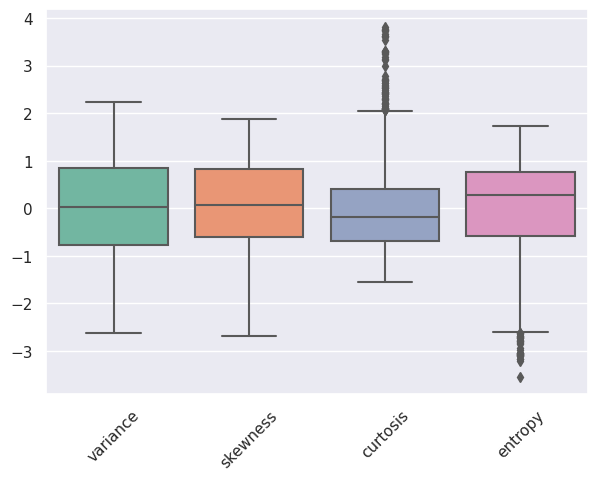

In [38]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

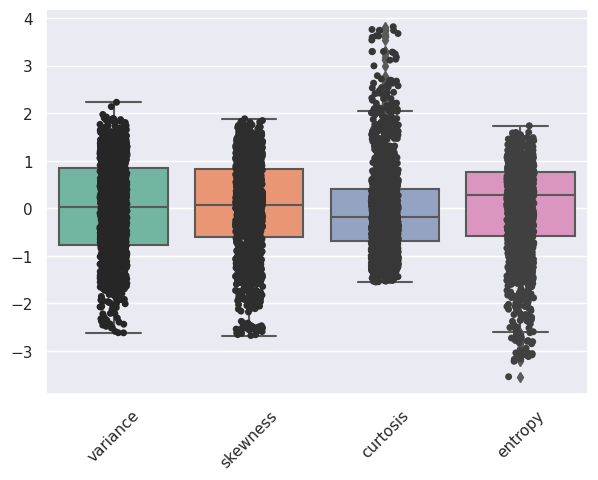

In [19]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

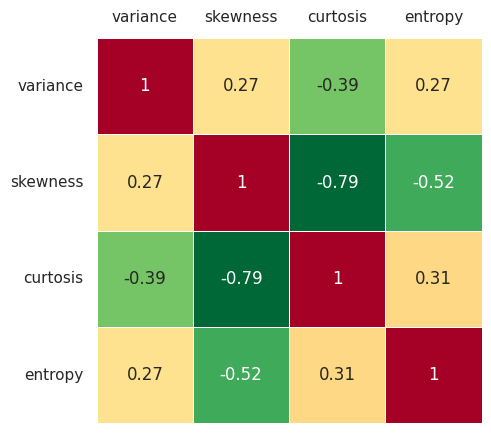

In [20]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')
     

Text(0, 0.5, 'Yes')

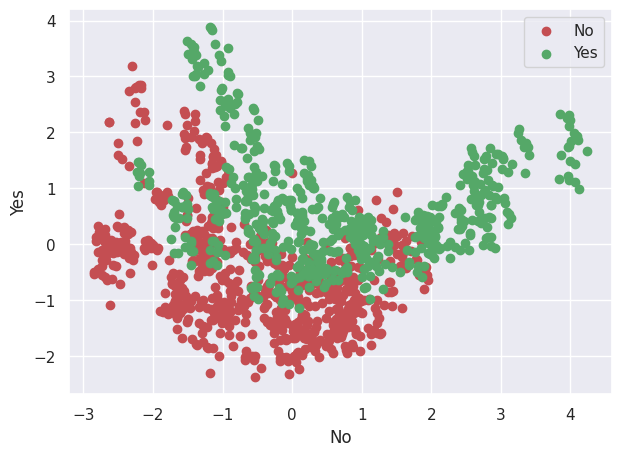

In [21]:


pca = PCA()
Z = pca.fit_transform(X)

# 1(No)->0,  2(Yes)->1, 
idx_No = np.where(y == 0)
idx_Yes = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_No,0], Z[idx_No,1], c='r', label='No')
plt.scatter(Z[idx_Yes,0], Z[idx_Yes,1], c='g', label='Yes')

plt.legend()
plt.xlabel('No')
plt.ylabel('Yes')

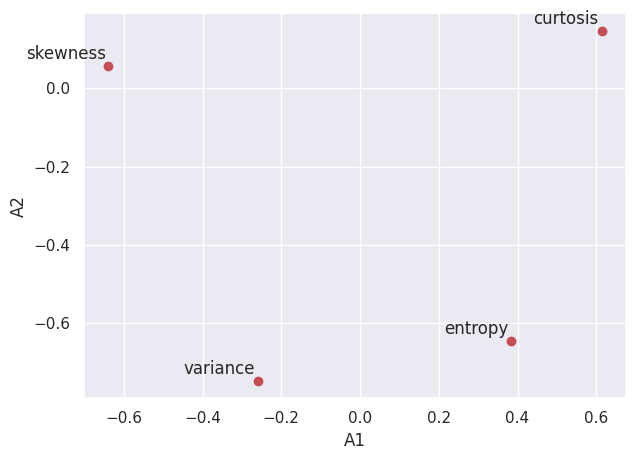

In [22]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

Text(0, 0.5, 'Explained variance')

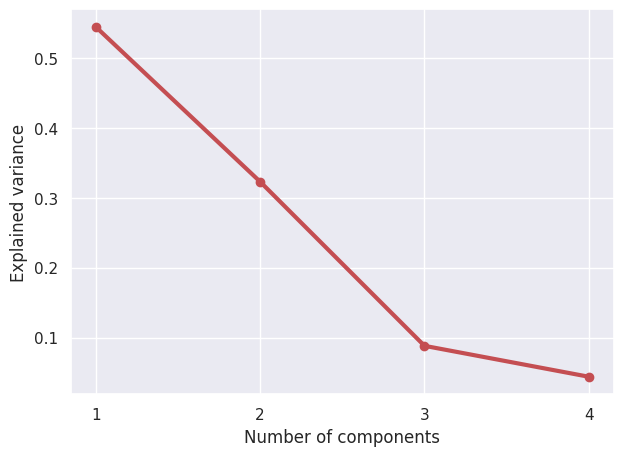

In [23]:


#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
     


Text(0, 0.5, 'Cumulative explained variance')

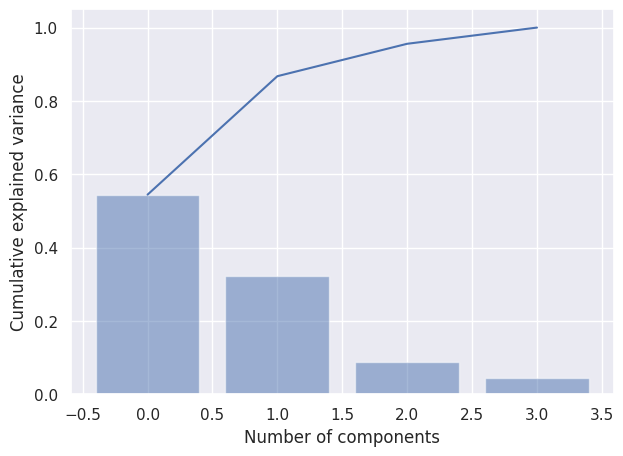

In [24]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

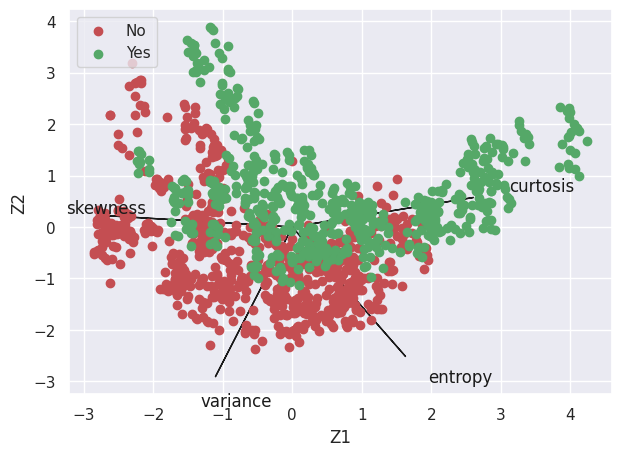

In [26]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_No,0], Z[idx_No,1], c='r', label='No')
plt.scatter(Z[idx_Yes,0], Z[idx_Yes,1], c='g', label='Yes')
plt.legend(loc='upper left')

In [27]:
!pip3 install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:


from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)
     

     


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [31]:


out['PC']
     


,PC1,PC2,PC3
0,-1.490628,-1.129742,-0.163507
1,-1.657912,-1.049547,0.374101
2,0.491385,-1.314803,0.510871
3,-2.319239,-0.144216,0.542544
4,1.184826,0.019732,0.421843
...,...,...,...
1343,-0.229196,-0.281177,-0.510413
1344,1.902340,0.116541,-0.089880
1345,4.053660,1.992841,1.783338
1346,3.021731,1.354033,0.681057


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (54.4% expl.var)', ylabel='PC2 (32.3% expl.var)'>)

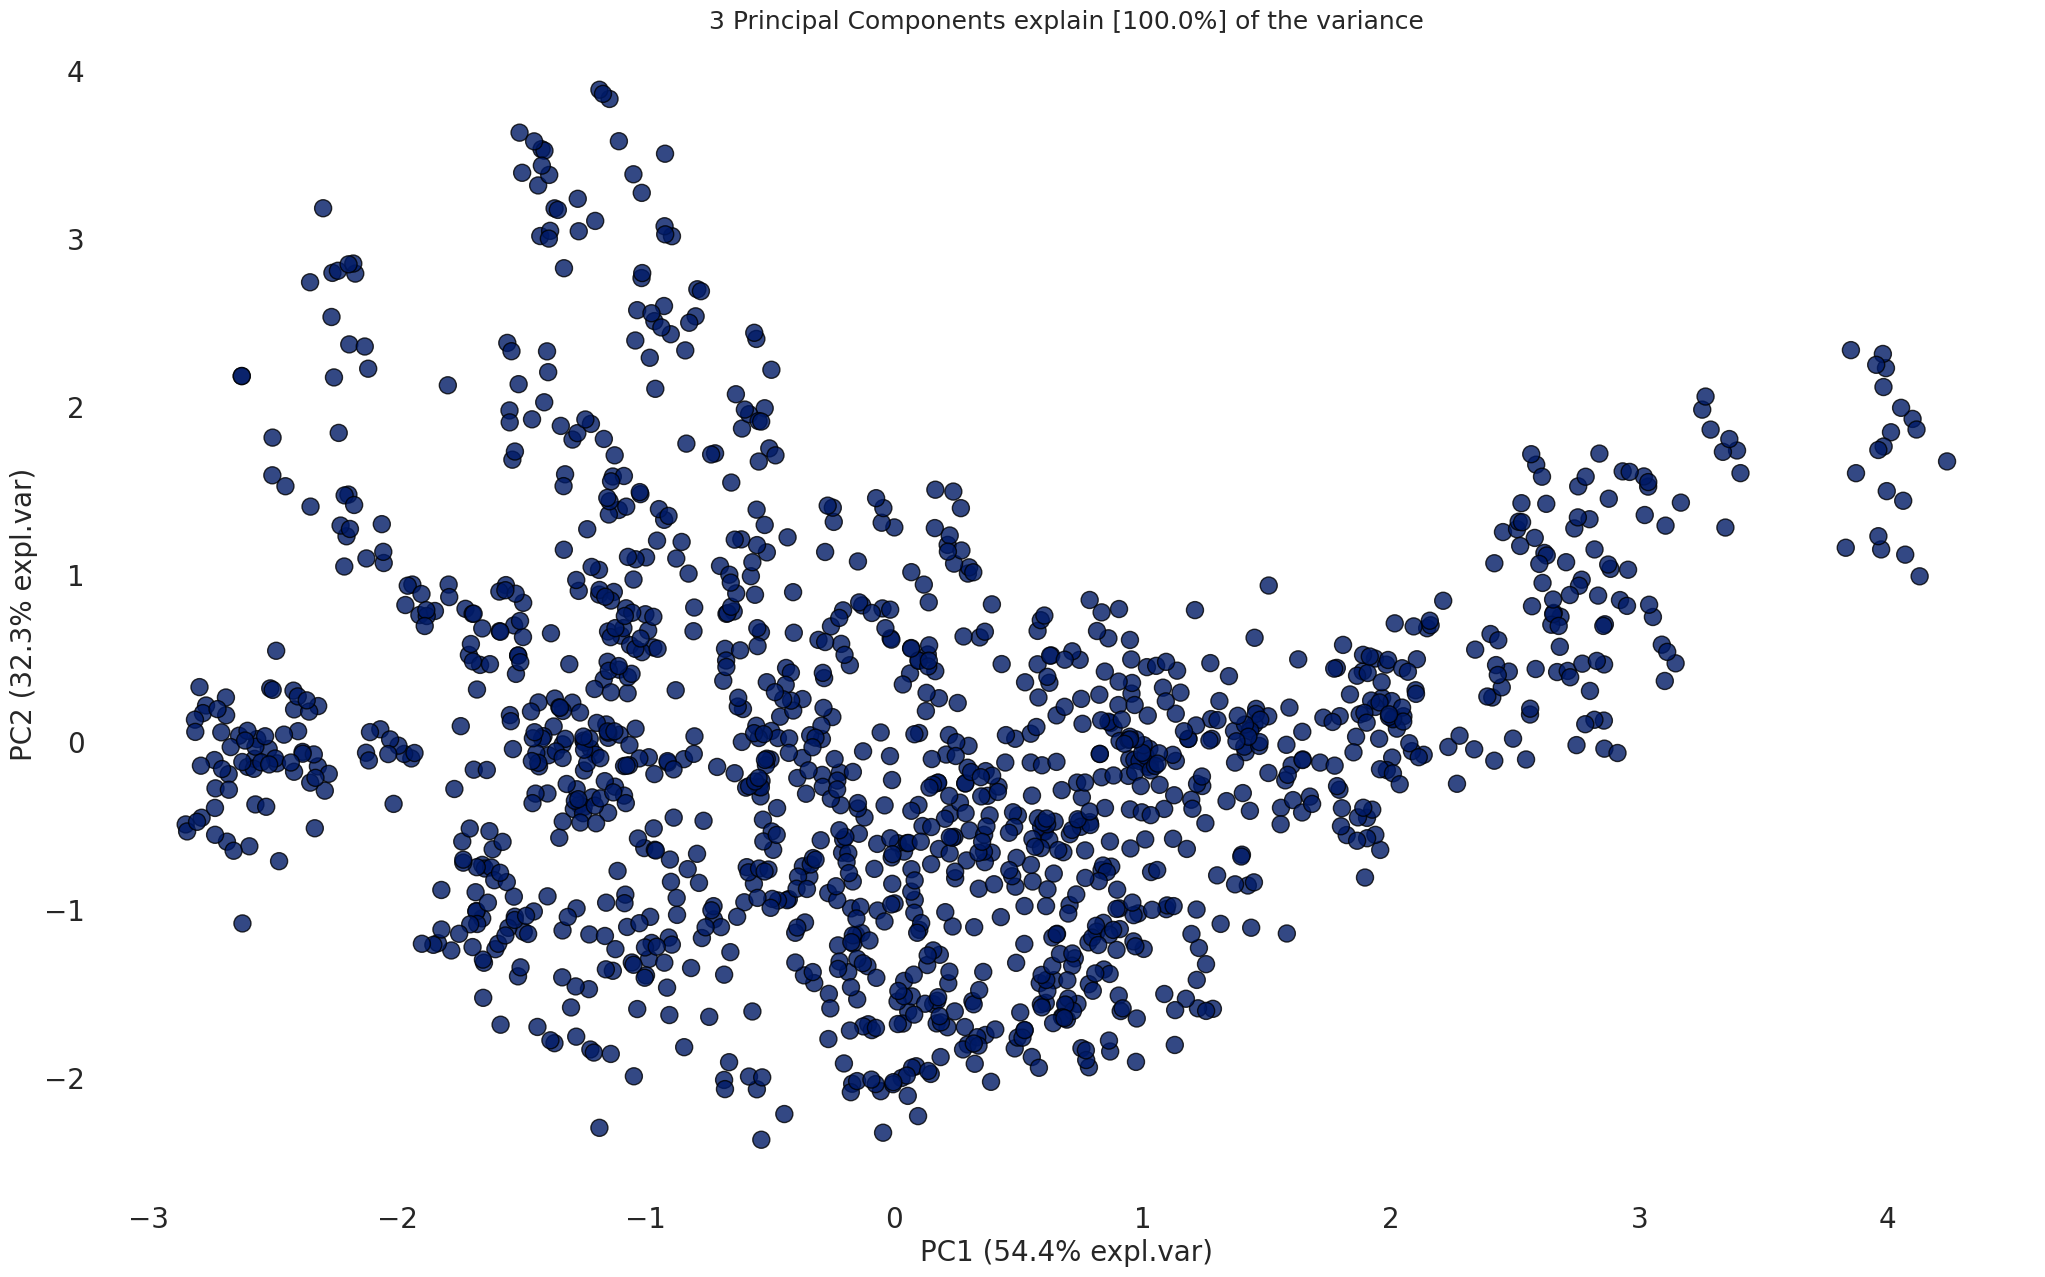

In [32]:

model.scatter(label=True, legend=False)

In [33]:


A = out['loadings'].T
     


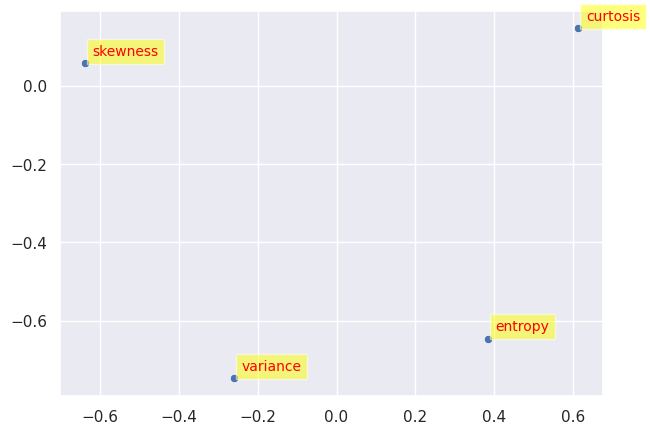

In [34]:

sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('')
plt.ylabel('')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

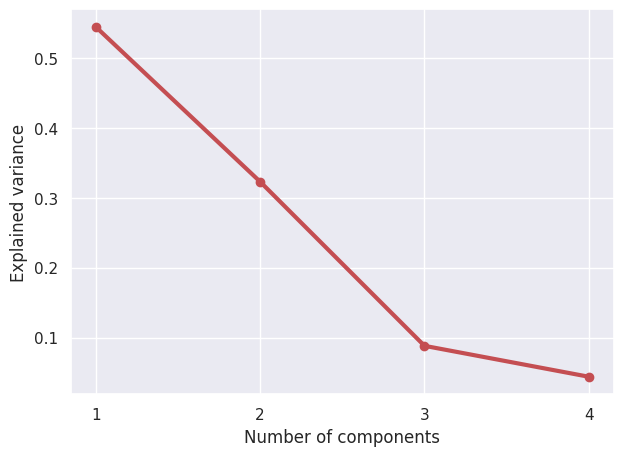

In [35]:


VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()
     


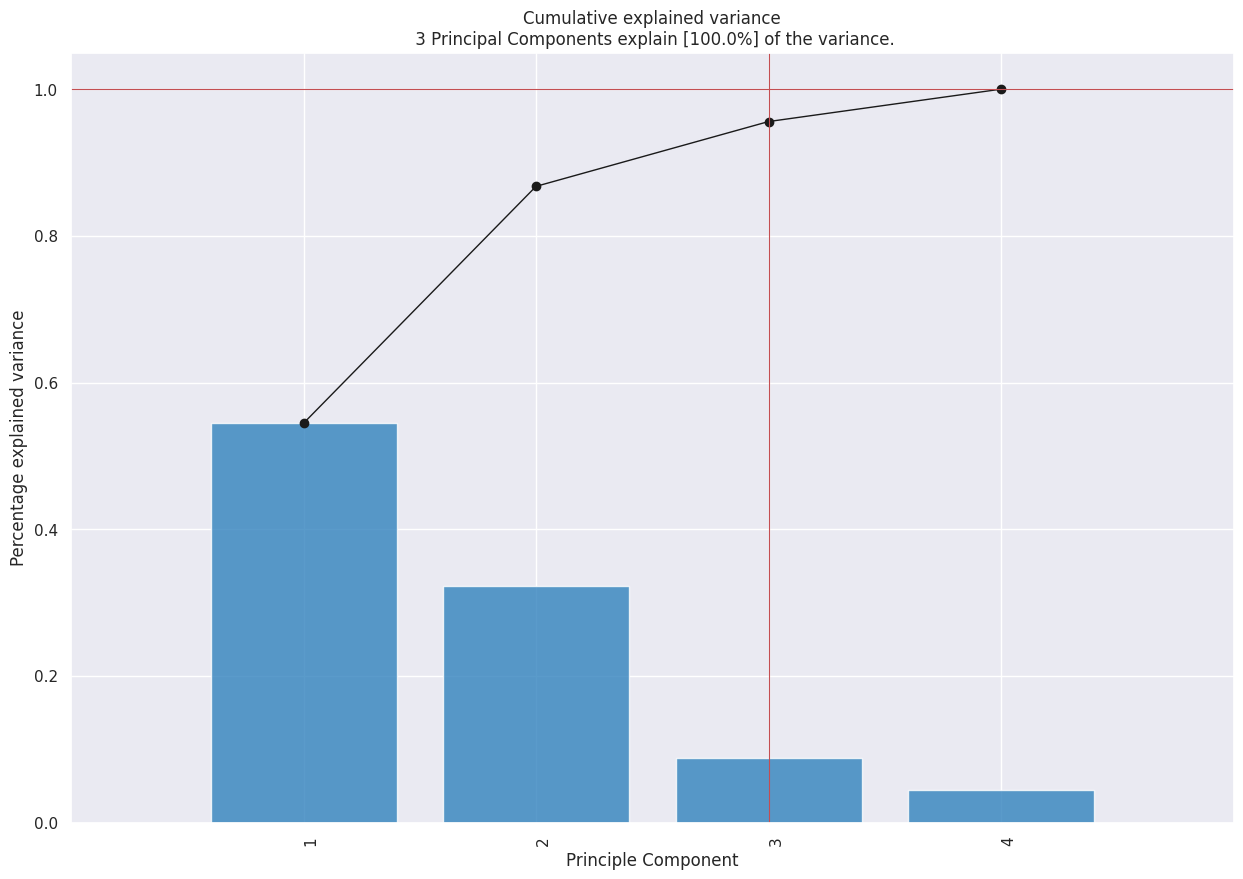

<Figure size 700x500 with 0 Axes>

In [36]:


model.plot();
     


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


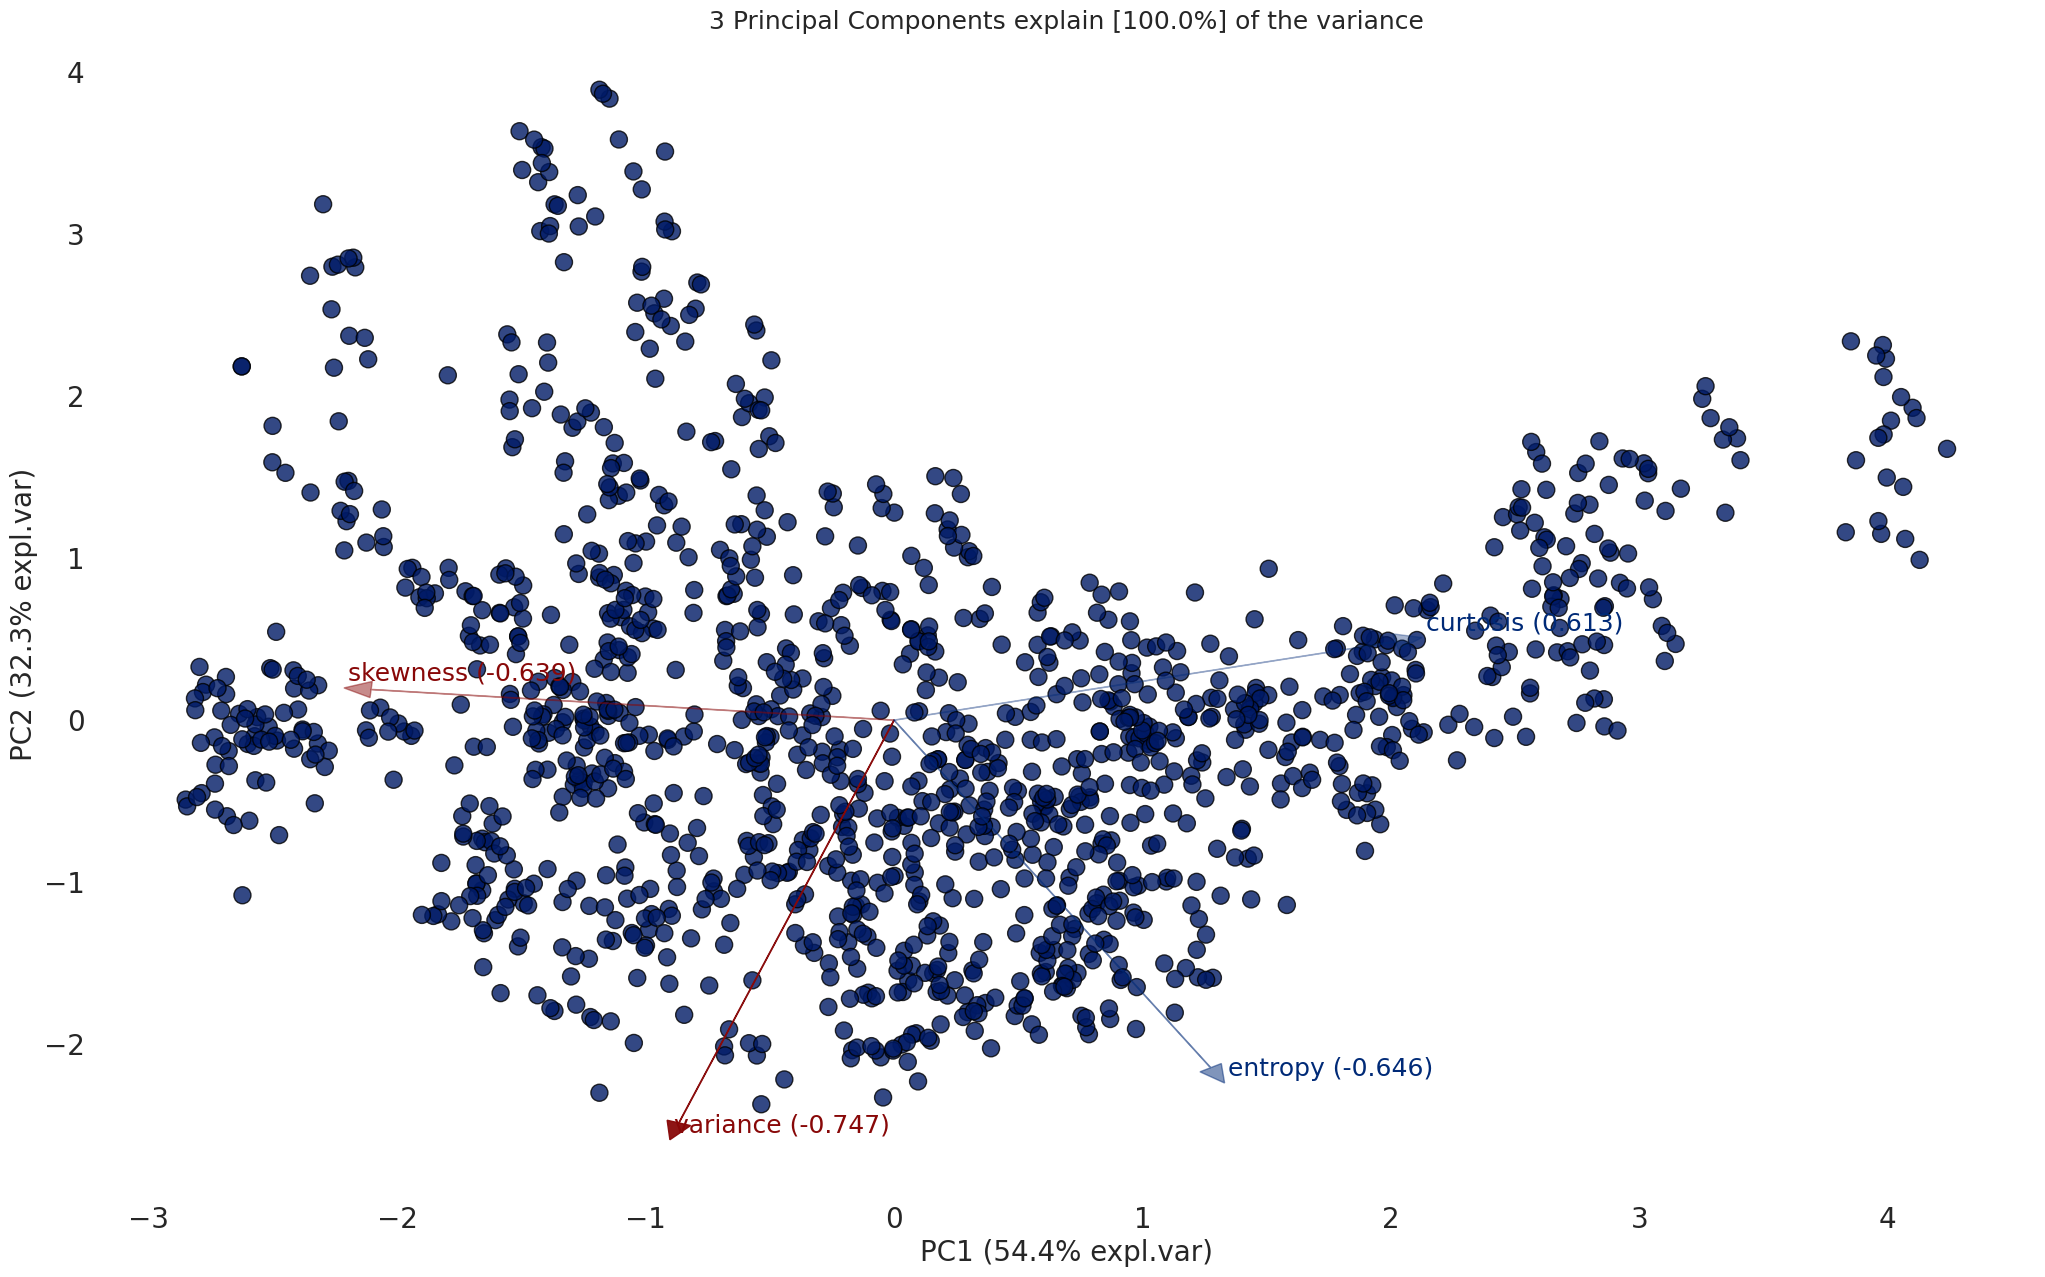

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (54.4% expl.var)', ylabel='PC2 (32.3% expl.var)'>)

In [37]:

model.biplot(label=False, legend=False)